# 机器学习大作业：Fashion MNIST分类与可视化
##### 2022217422 刘铠硕
### 选题：
第二大类：Scikit-learn自带数据数据集或Kaggle平台数据集上的机器学习算法研究（60分-95分）
2.1.基于scikit-learn、TensorFlow或PyTorch软件包，对Fashion MNIST数据集合进行分类，并可视化。每位同学至少要尝试1种不同的分类方法，并最终比较分类结果。
提交：工程报告+保存成HTML格式的Notebook代码。（完整的训练数据+工程源代码+打包程序，上传github）
https://www.kaggle.com/datasets/zalando-research/fashionmnist/code


In [2]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, learning_curve
from ipywidgets import interact, Dropdown, IntSlider
from sklearn.model_selection import validation_curve

## 导入库
导入了用于数据处理、模型构建、评估和可视化的必要库。这些库是构建任何数据科学项目的基础。详细说明每个库的作用如下所述：

numpy: 提供高性能的多维数组对象和工具，用于处理和计算这些数组。
pandas: 提供数据结构和数据分析工具。
matplotlib.pyplot: 是一个非常流行的绘图库，提供了大量的工具，可以帮助用户创建高质量的图形。
seaborn: 基于matplotlib的高级可视化库，用于绘制更加复杂的统计图形。
RandomForestClassifier: 随机森林分类器，是sklearn库中的一个模型，用于构建一个包含多个决策树的分类器，对新的数据点进行有效分类。
accuracy_score, confusion_matrix, roc_curve, auc: 这些都是sklearn.metrics模块中的函数，用于模型评估：
accuracy_score：计算分类的准确率。
confusion_matrix：生成一个混淆矩阵，帮助观察分类模型的性能。
roc_curve：计算接收者操作特征曲线（ROC），用于分析二分类模型。
auc：计算曲线下面积，通常用于ROC曲线，评价分类模型的性能。
train_test_split, learning_curve, validation_curve: 这些是sklearn.model_selection模块中的函数，用于模型选择和评估：
train_test_split：随机划分数据为训练集和测试集，用于模型训练和验证。
learning_curve：生成给定模型和数据的学习曲线，用于分析训练样本大小如何影响模型的表现。
validation_curve：生成模型参数的验证曲线，帮助分析不同参数值对模型性能的影响。
ipywidgets (interact, Dropdown, IntSlider): 这些工具用于创建交互式的UI控件，例如滑块和下拉菜单，增加笔记本的交互性。

In [17]:
# 确保Matplotlib内联显示图形
%matplotlib inline
# 更改字体设置，避免中文变成黑方块
# 注意：代码输出的所有可视化结果图中必须加中文标题，并在标题结尾加上“实现该代码的学生姓名”，如“多种算法ROC曲线对比图-张三”。
# 使用 plt.rcParams 更新全局设置
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

%matplotlib inline 的作用是确保在Jupyter Notebook中使用matplotlib绘图时，生成的图形会直接嵌入到笔记本的页面中，即图形会显示在代码单元的输出部分。

In [4]:
# 加载数据
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

## 加载数据
加载训练和测试数据集，确保数据文件放在与Notebook相同的目录下，以便无误地读取数据。


In [5]:
# 分离特征和标签
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

## 数据预处理
分离特征和标签以准备数据，使其适合进行机器学习建模。这一步骤是准备训练和测试数据集的重要环节。
特征提取：机器学习模型无法直接处理原始数据，需要将数据分为“特征”（用于模型输入的数据）和“标签”（模型尝试预测的结果）。
模型训练：使用X_train和y_train对机器学习模型进行训练。
模型测试：使用X_test和y_test来评估训练后模型的性能，检查模型在未见数据上的表现。

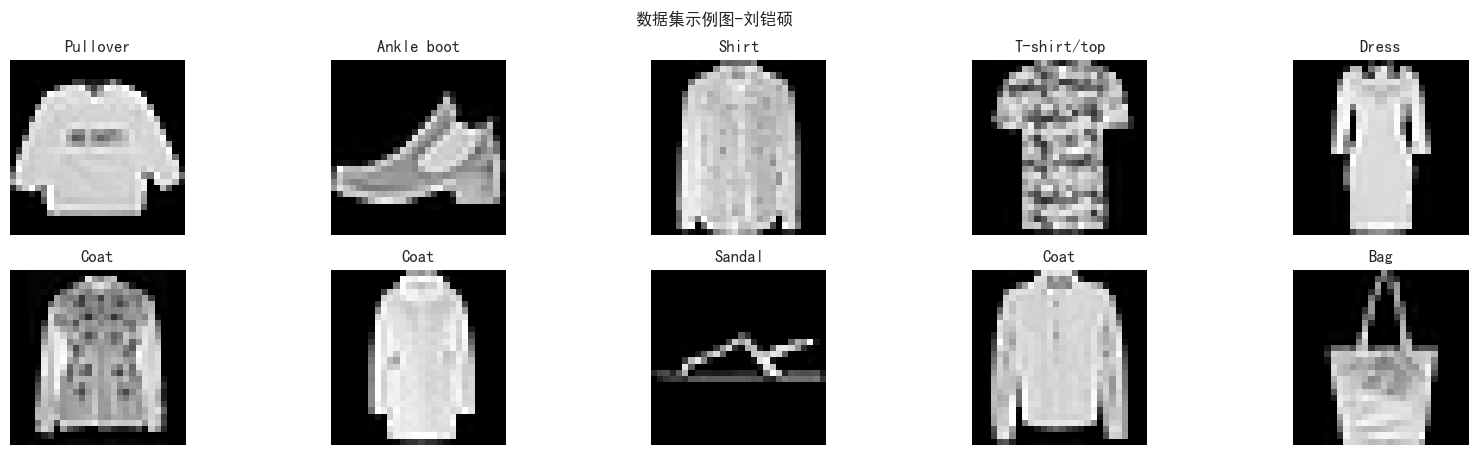

In [19]:
# 数据探索与可视化
labels_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

def plot_images(images, labels):
    n = 10  # 展示10张图片
    plt.figure(figsize=(20, 5))
    for i in range(n):
        ax = plt.subplot(2, 5, i + 1)
        img = images[i].reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(labels_dict[labels[i]])
        plt.axis('off')
    plt.suptitle('数据集示例图-刘铠硕')  # 设置总标题
    plt.show()

plot_images(X_train, y_train)

## 数据探索与可视化
初步数据探索：在开始复杂的数据预处理和模型训练前，我们应该了解数据的基本形态。这里抽出了几组图作为展示
Pullover（套头衫）: 典型的套头衫，有明显的袖子和领口。
Ankle boot（踝靴）:高至踝部的靴子，这种鞋类具有较高的边缘和显著的鞋底。
Shirt（衬衫）: 可见衬衫的典型特征，如纽扣和领口，表明它是较为正式的装束。
T-shirt/top（T恤/上衣）: 休闲的T恤，具有圆领和短袖。
Dress（连衣裙）: 一件女性常穿的连衣裙，有着较长的裙摆和袖子。
Coat（外套）: 图中外套有明显的大按钮和开襟设计。
Sandal（凉鞋）: 展示了一只典型的开口鞋，可见鞋带交叉的细节。
Bag（包）: 图中的包为典型的手提袋，有提手和较为宽阔的容纳空间。

可视化的重要性：
这些图像的可视化帮助理解数据集中每种类别的基本视觉特征，这对于后续的数据预处理、模型选择和训练至关重要。通过可视化，我们可以直观地看到每类物品的区别，这有助于在设计模型时考虑如何处理这些不同的图像特征。例如，如果一类物品的图像比其他类别的变化更大，可能需要更复杂的特征提取方法或更多的训练数据来改善模型在该类别的表现。这种可视化也是检查数据是否有错误或异常值的一个好方法。例如，如果某个类别中的图像与预期显著不同，可能需要检查数据标记过程是否有误。

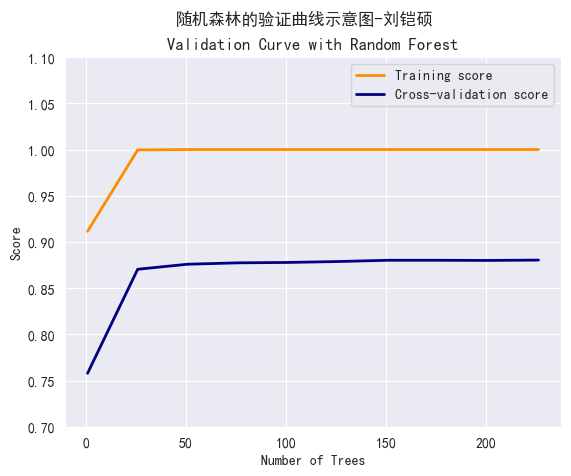

In [20]:
# 验证曲线的绘制
# 生成和绘制随机森林模型中树的数量（n_estimators）对模型性能的影响的验证曲线
# 定义随机森林中树的数量范围
param_range = np.arange(1, 250, 25)

# 使用validation_curve函数来计算指定参数范围内的训练和测试得分
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42),  # 随机森林分类器，固定随机种子以确保可复现性
    X_train, y_train,                         # 使用训练数据和标签
    param_name="n_estimators",                # 要验证的参数名称
    param_range=param_range,                  # 参数的值范围
    cv=3,                                     # 交叉验证折数
    scoring="accuracy",                       # 评分标准为准确率
    n_jobs=-1)                                # 使用所有可用的CPU核心

# 计算训练得分和测试得分的均值
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# 绘制验证曲线
plt.figure()
plt.title("Validation Curve with Random Forest")
plt.suptitle('随机森林的验证曲线示意图-刘铠硕')  # 设置总标题
plt.xlabel("Number of Trees")                # X轴标签为“树的数量”
plt.ylabel("Score")                          # Y轴标签为“得分”
plt.ylim(0.7, 1.1)                           # 设置Y轴的显示范围
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=2)
plt.legend(loc="best")                       # 显示图例
plt.show()


## 验证曲线
从验证曲线图看，模型的训练得分（训练集上的得分）和交叉验证得分（测试集上的得分）在树的数量增加时有明显的变化。特别是：
训练得分在增加树的数量后很快达到接近完美的1.0，这表明模型能够很好地拟合训练数据。
交叉验证得分在树的数量超过大概35棵树后趋于稳定，在此之后增加更多的树并没有显著提高模型在未见数据上的表现。
基于这些观察，来选择训练随机森林模型的参数：
由于交叉验证得分在大约35棵树后趋于稳定，n_estimators需要设置在这个数值附近，或者比这个数值略大一些
这样可以避免过度拟合和不必要的计算资源消耗。

In [8]:
# 训练随机森林模型
rf_classifier_optimized = RandomForestClassifier(n_estimators=40, random_state=42)
rf_classifier_optimized.fit(X_train, y_train)
y_pred_optimized = rf_classifier_optimized.predict(X_test)

In [9]:
# 计算模型的准确率
accuracy = accuracy_score(y_test, y_pred_optimized)
print(f'Accuracy of Random Forest: {accuracy:.2f}')

Accuracy of Random Forest: 0.88


## 模型训练
使用训练数据集来训练或"拟合"模型，使其能够从给定数据中学习到如何预测结果。

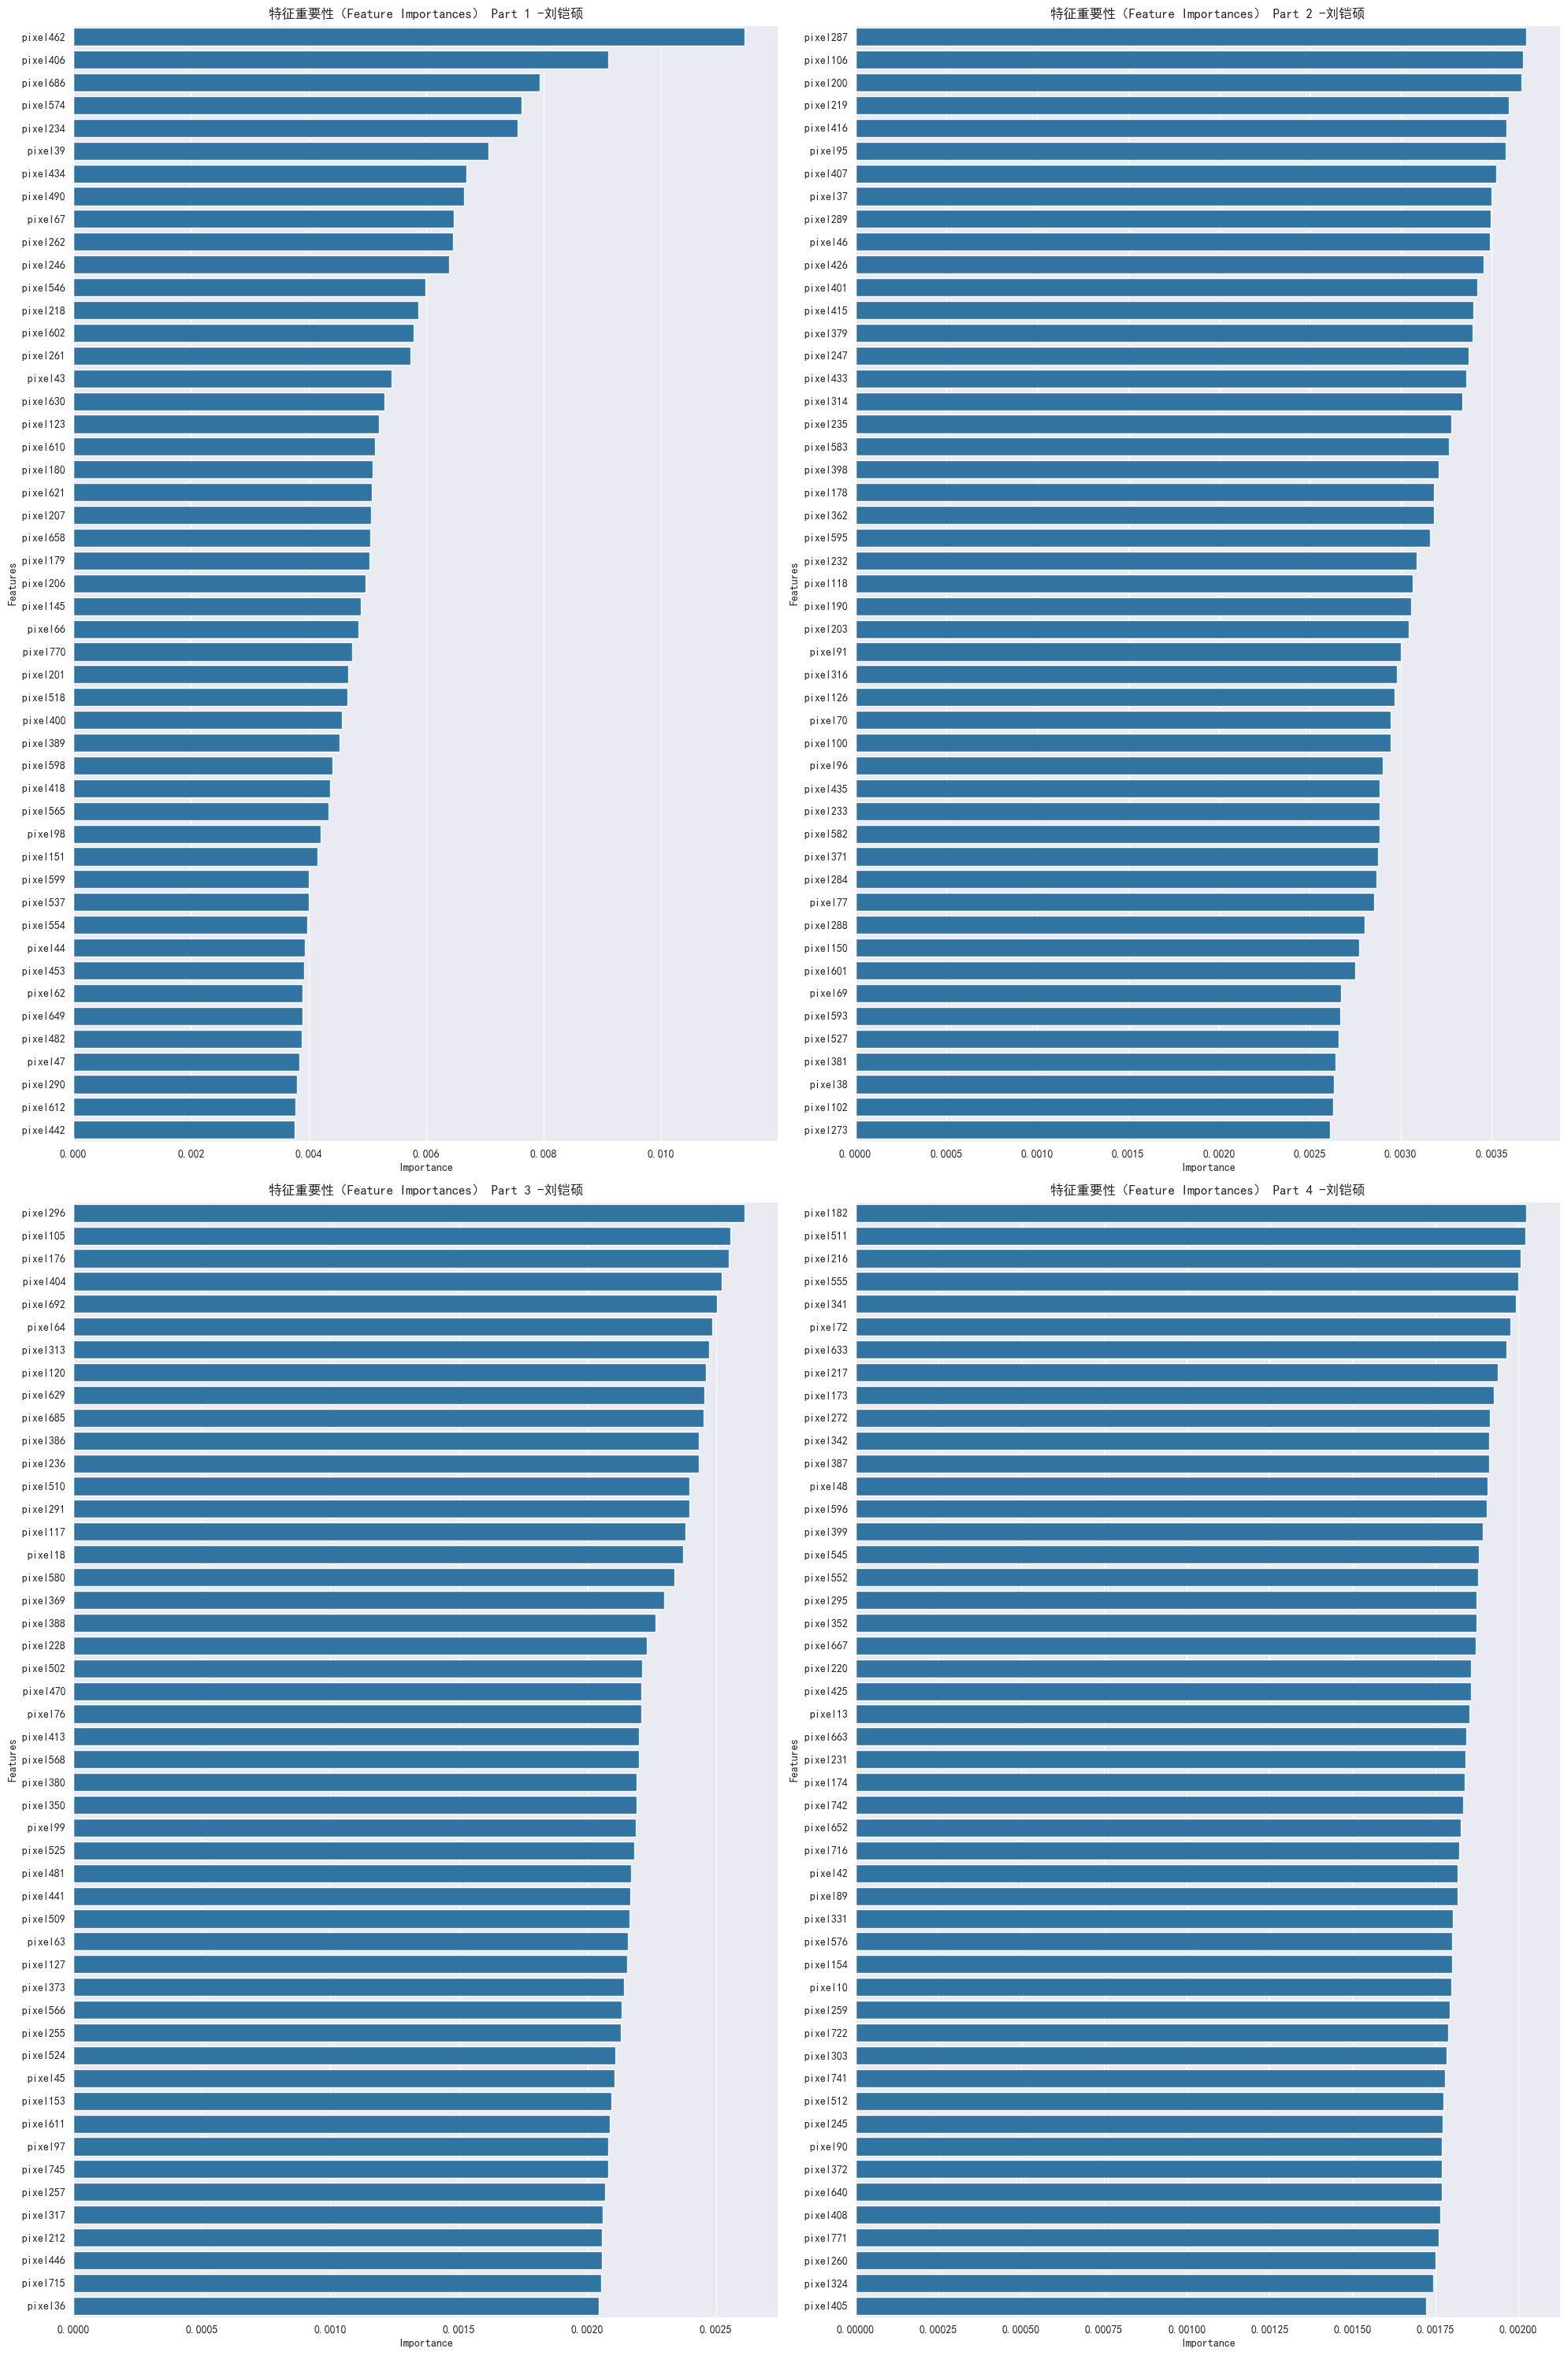

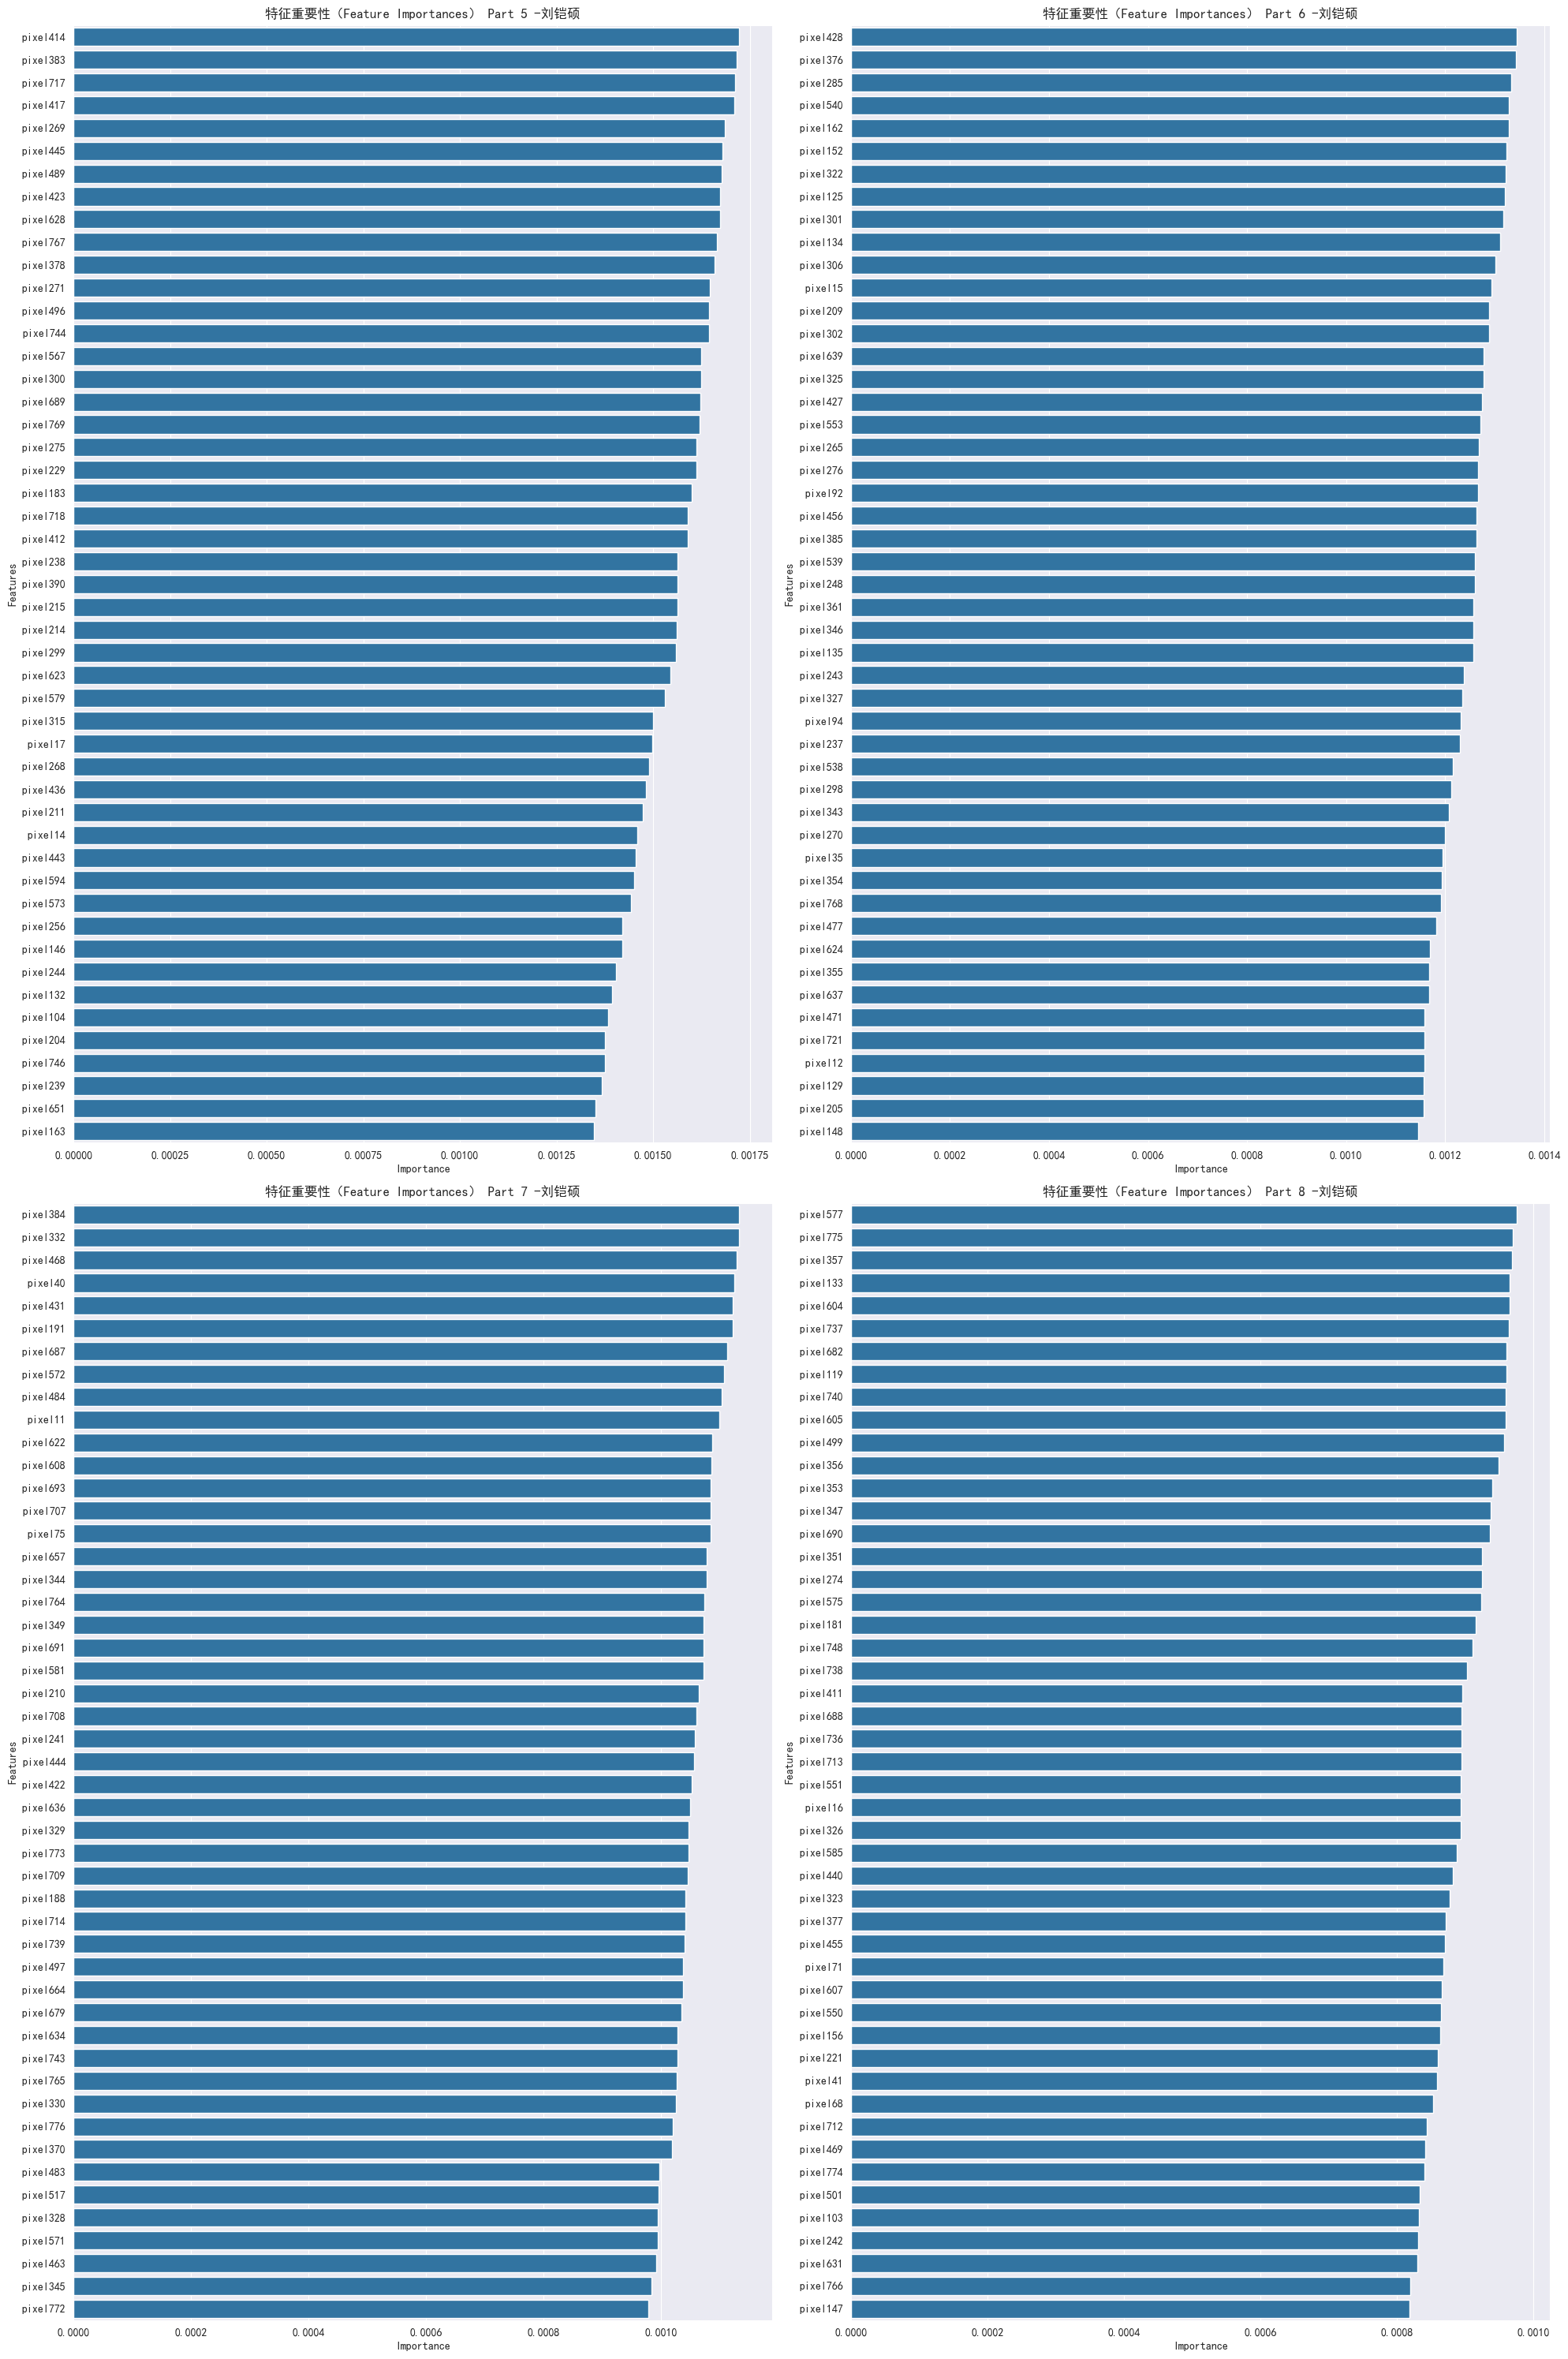

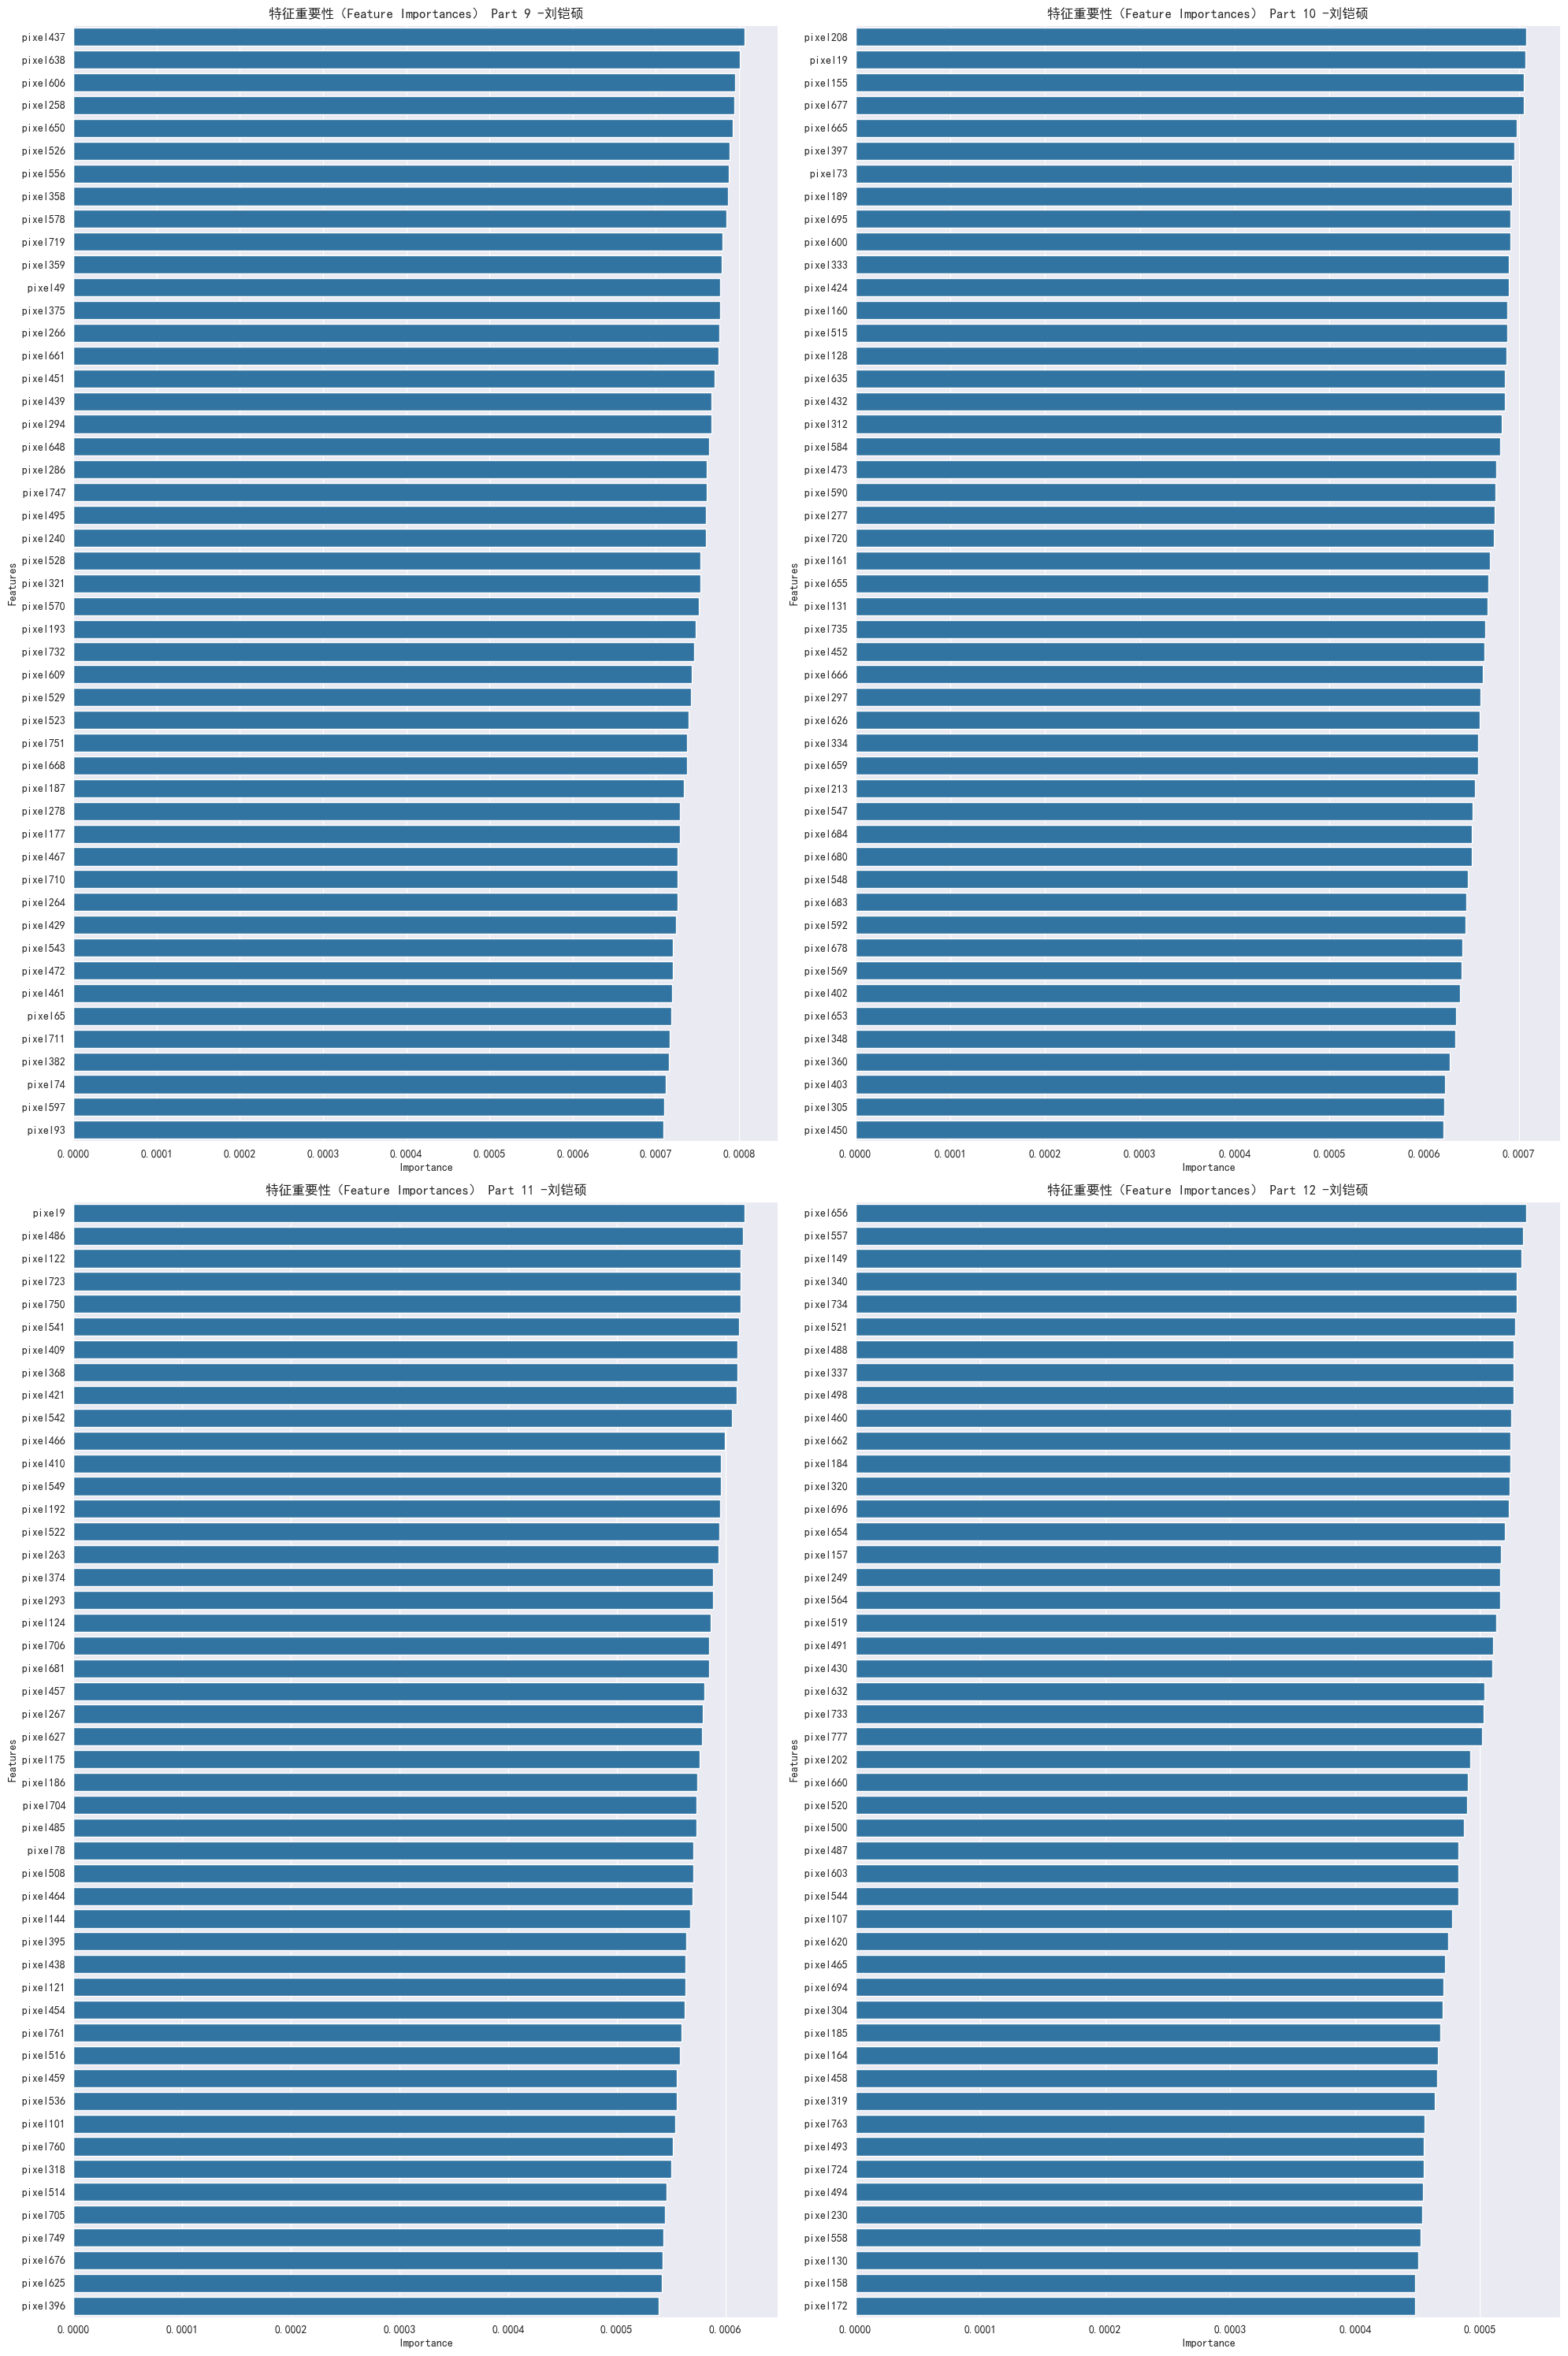

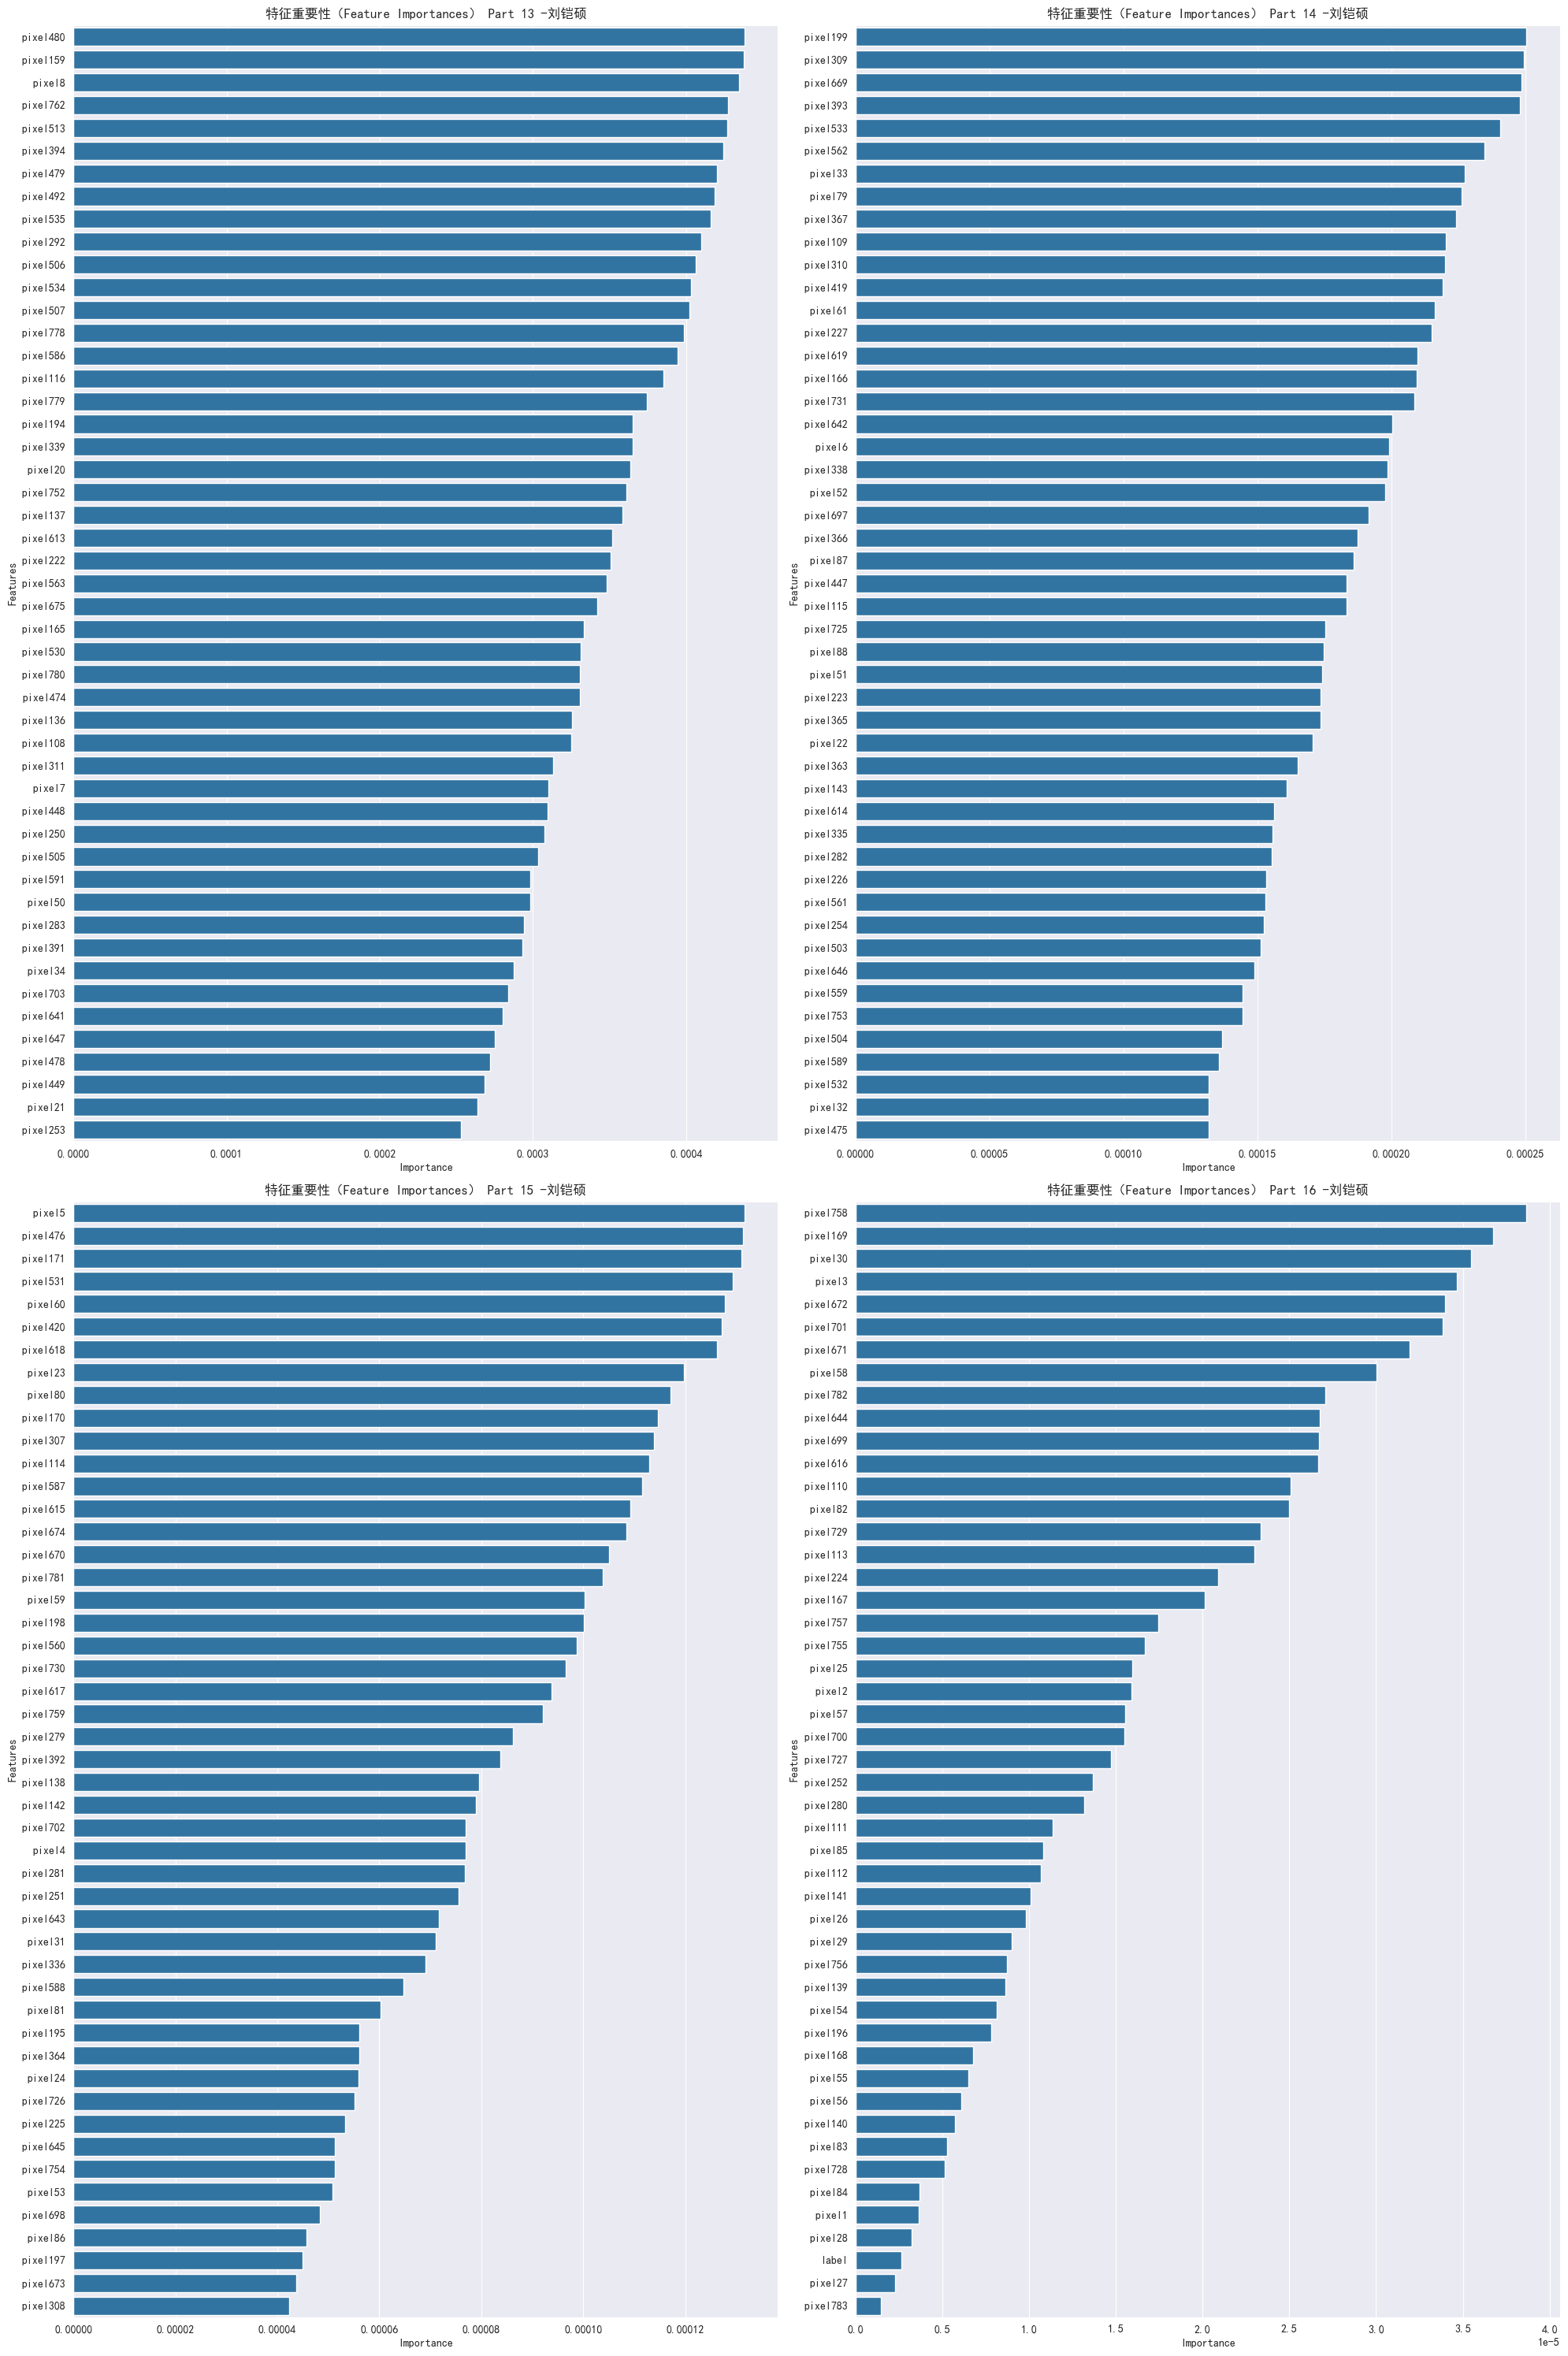

In [18]:
# 特征重要性评估

# 获取特征重要性和特征名称
importances = rf_classifier_optimized.feature_importances_
features = train_data.columns[:-1]  # 假设最后一列是标签

# 创建一个排序索引，根据重要性降序排列
sorted_indices = np.argsort(importances)[::-1]

# 分成16个部分
parts = np.array_split(sorted_indices, 16)

# 每四个部分生成一张大图
for big_part_index in range(4):
    fig, axs = plt.subplots(2, 2, figsize=(20, 30))  # 宽度20英寸，高度30英寸
    for i, ax in enumerate(axs.flatten()):
        part_index = big_part_index * 4 + i
        if part_index < len(parts):
            sns.barplot(x=importances[parts[part_index]], y=features[parts[part_index]], ax=ax)
            ax.set_title(f'特征重要性（Feature Importances） Part {part_index + 1} -刘铠硕')
# 注意：代码输出的所有可视化结果图中必须加中文标题，并在标题结尾加上“实现该代码的学生姓名”，如“多种算法ROC曲线对比图-张三”。
            ax.set_xlabel('Importance')
            ax.set_ylabel('Features')
    plt.tight_layout()
    plt.show()

## 特征重要性评估
### 代码的作用
#### 获取特征重要性：

importances = rf_classifier_optimized.feature_importances_: 此行代码获取随机森林模型中每个特征的重要性得分。这些得分表示了每个特征对于模型预测结果的影响程度。
#### 排序和分段：

sorted_indices = np.argsort(importances)[::-1]: 对特征重要性进行降序排序，以便最重要的特征排在前面。
parts = np.array_split(sorted_indices, 16): 将特征按重要性分成16个部分，便于分批次详细展示。
#### 可视化特征重要性：

通过循环生成多个条形图，每个图表展示一部分的特征重要性。这种分批展示可以更清晰地看到不同特征的重要性对比，尤其是在特征数量很多时。
### 重要性评估的作用
模型解释性：特征重要性帮助解释模型的决策过程。了解哪些特征对预测结果影响最大，可以提高模型的透明度和可信度。
特征选择：通过识别最有影响的特征，可以进行特征选择，删除那些对模型影响不大的特征。这不仅可以简化模型，还可以减少过拟合的风险，并可能提高模型的预测性能。
业务洞察：在许多应用场景中，了解哪些变量最重要可以提供关键的业务洞察，帮助决策者集中资源和注意力于那些最能影响结果的因素。
### 图表的理解
每个图表展示了不同批次的特征重要性，其中横轴代表特征的重要性得分，纵轴代表特征名称。这种条形图形式可以直观地看出哪些特征对模型预测结果有较大的贡献，哪些特征相对不那么重要。

### 补充说明
此处如果用一张长图来表示会使图片高度过高，故用4张4*4的图片来存放列表。

## 混淆矩阵与分类误差矩阵

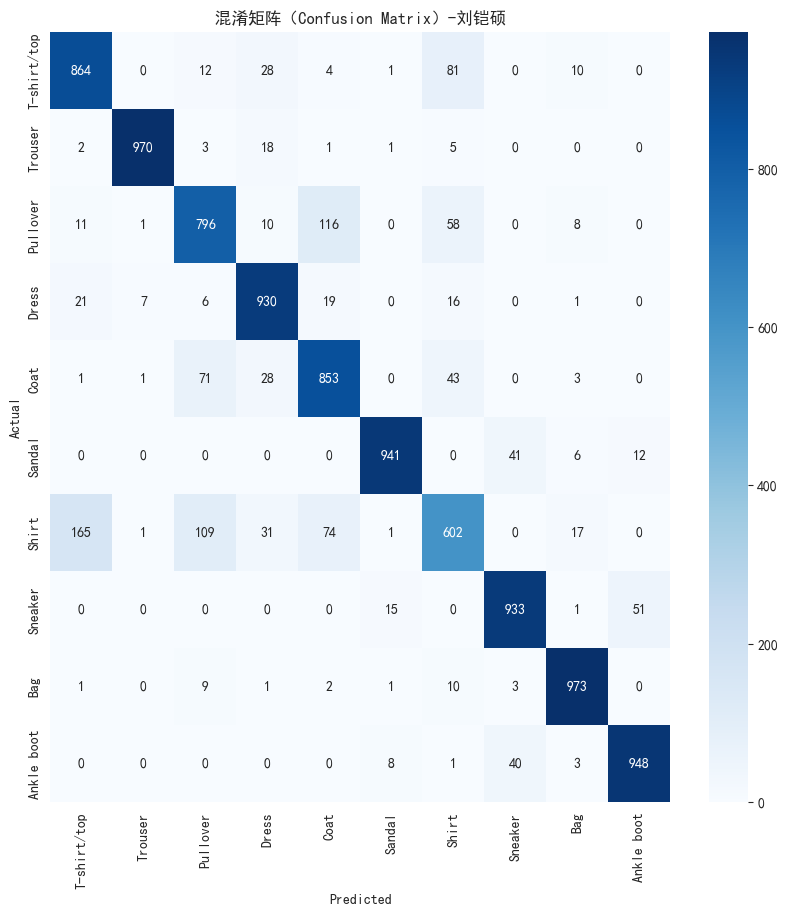

In [21]:
# 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(labels_dict.values()), yticklabels=list(labels_dict.values()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('混淆矩阵（Confusion Matrix）-刘铠硕')
#注意：代码输出的所有可视化结果图中必须加中文标题，并在标题结尾加上“实现该代码的学生姓名”，如“多种算法ROC曲线对比图-张三”。
plt.show()

在处理分类任务时，传统的残差图（通常用于回归分析中评估模型预测与实际值之间的差异）可能不是特别合适。不过，对于分类任务，我们可以使用一种类似的概念，即分类误差图，来评估每个类别的预测误差。这可以帮助我们理解模型在特定类别上的表现如何，哪些类别更容易被误分类。

对于Fashion MNIST项目，我们可以通过对比预测值与实际值来创建一个误差矩阵，并使用热图来可视化这些数据。这样的图可以提供模型在每个类别上的表现概览，有助于识别模型的弱点。

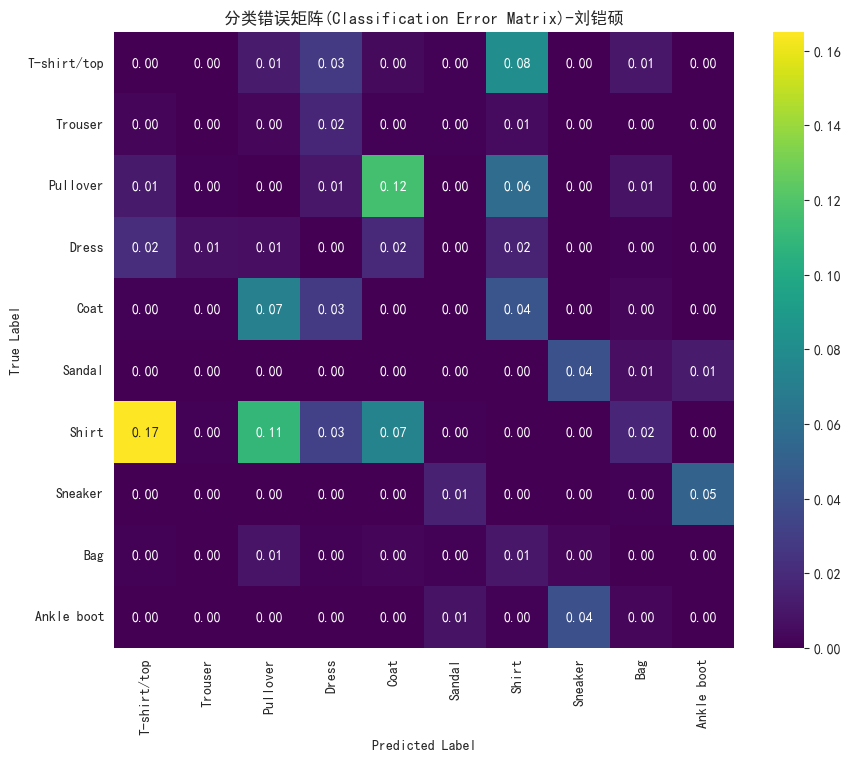

In [23]:
# 预测测试集
y_pred = rf_classifier_optimized.predict(X_test)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 计算分类误差
errors = cm / cm.sum(axis=1, keepdims=True)
np.fill_diagonal(errors, 0)  # 将对角线置为0，以便专注于错误

# 绘制热图表示分类误差
plt.figure(figsize=(10, 8))
sns.heatmap(errors, annot=True, cmap='viridis', fmt=".2f", xticklabels=list(labels_dict.values()), yticklabels=list(labels_dict.values()))
plt.title('分类错误矩阵(Classification Error Matrix)-刘铠硕')
#注意：代码输出的所有可视化结果图中必须加中文标题，并在标题结尾加上“实现该代码的学生姓名”，如“多种算法ROC曲线对比图-张三”。
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

这两幅图都是用来展示分类模型在多分类任务中性能的可视化表示，但它们各自聚焦于不同的方面。

混淆矩阵:
显示了实际类别与模型预测之间的关系。
每个单元格的值表示该行类别实际为真时，模型预测为该列类别的样本数量。
主对角线上的值代表正确分类的样本数量，而非对角线上的值代表误分类的样本数量。
深色单元格代表较高数量，如主对角线上的高值表示正确预测的多数情况。
分类错误矩阵:
显示了相同信息的归一化版本，特别关注分类错误的比例。
每个单元格的值表示模型预测错误的比例，相对于该类别的总样本数。
值越大（颜色越深），表示模型在该类别的预测错误率越高。
这种矩阵有助于快速识别模型在哪些类别上表现不佳。


## ROC曲线


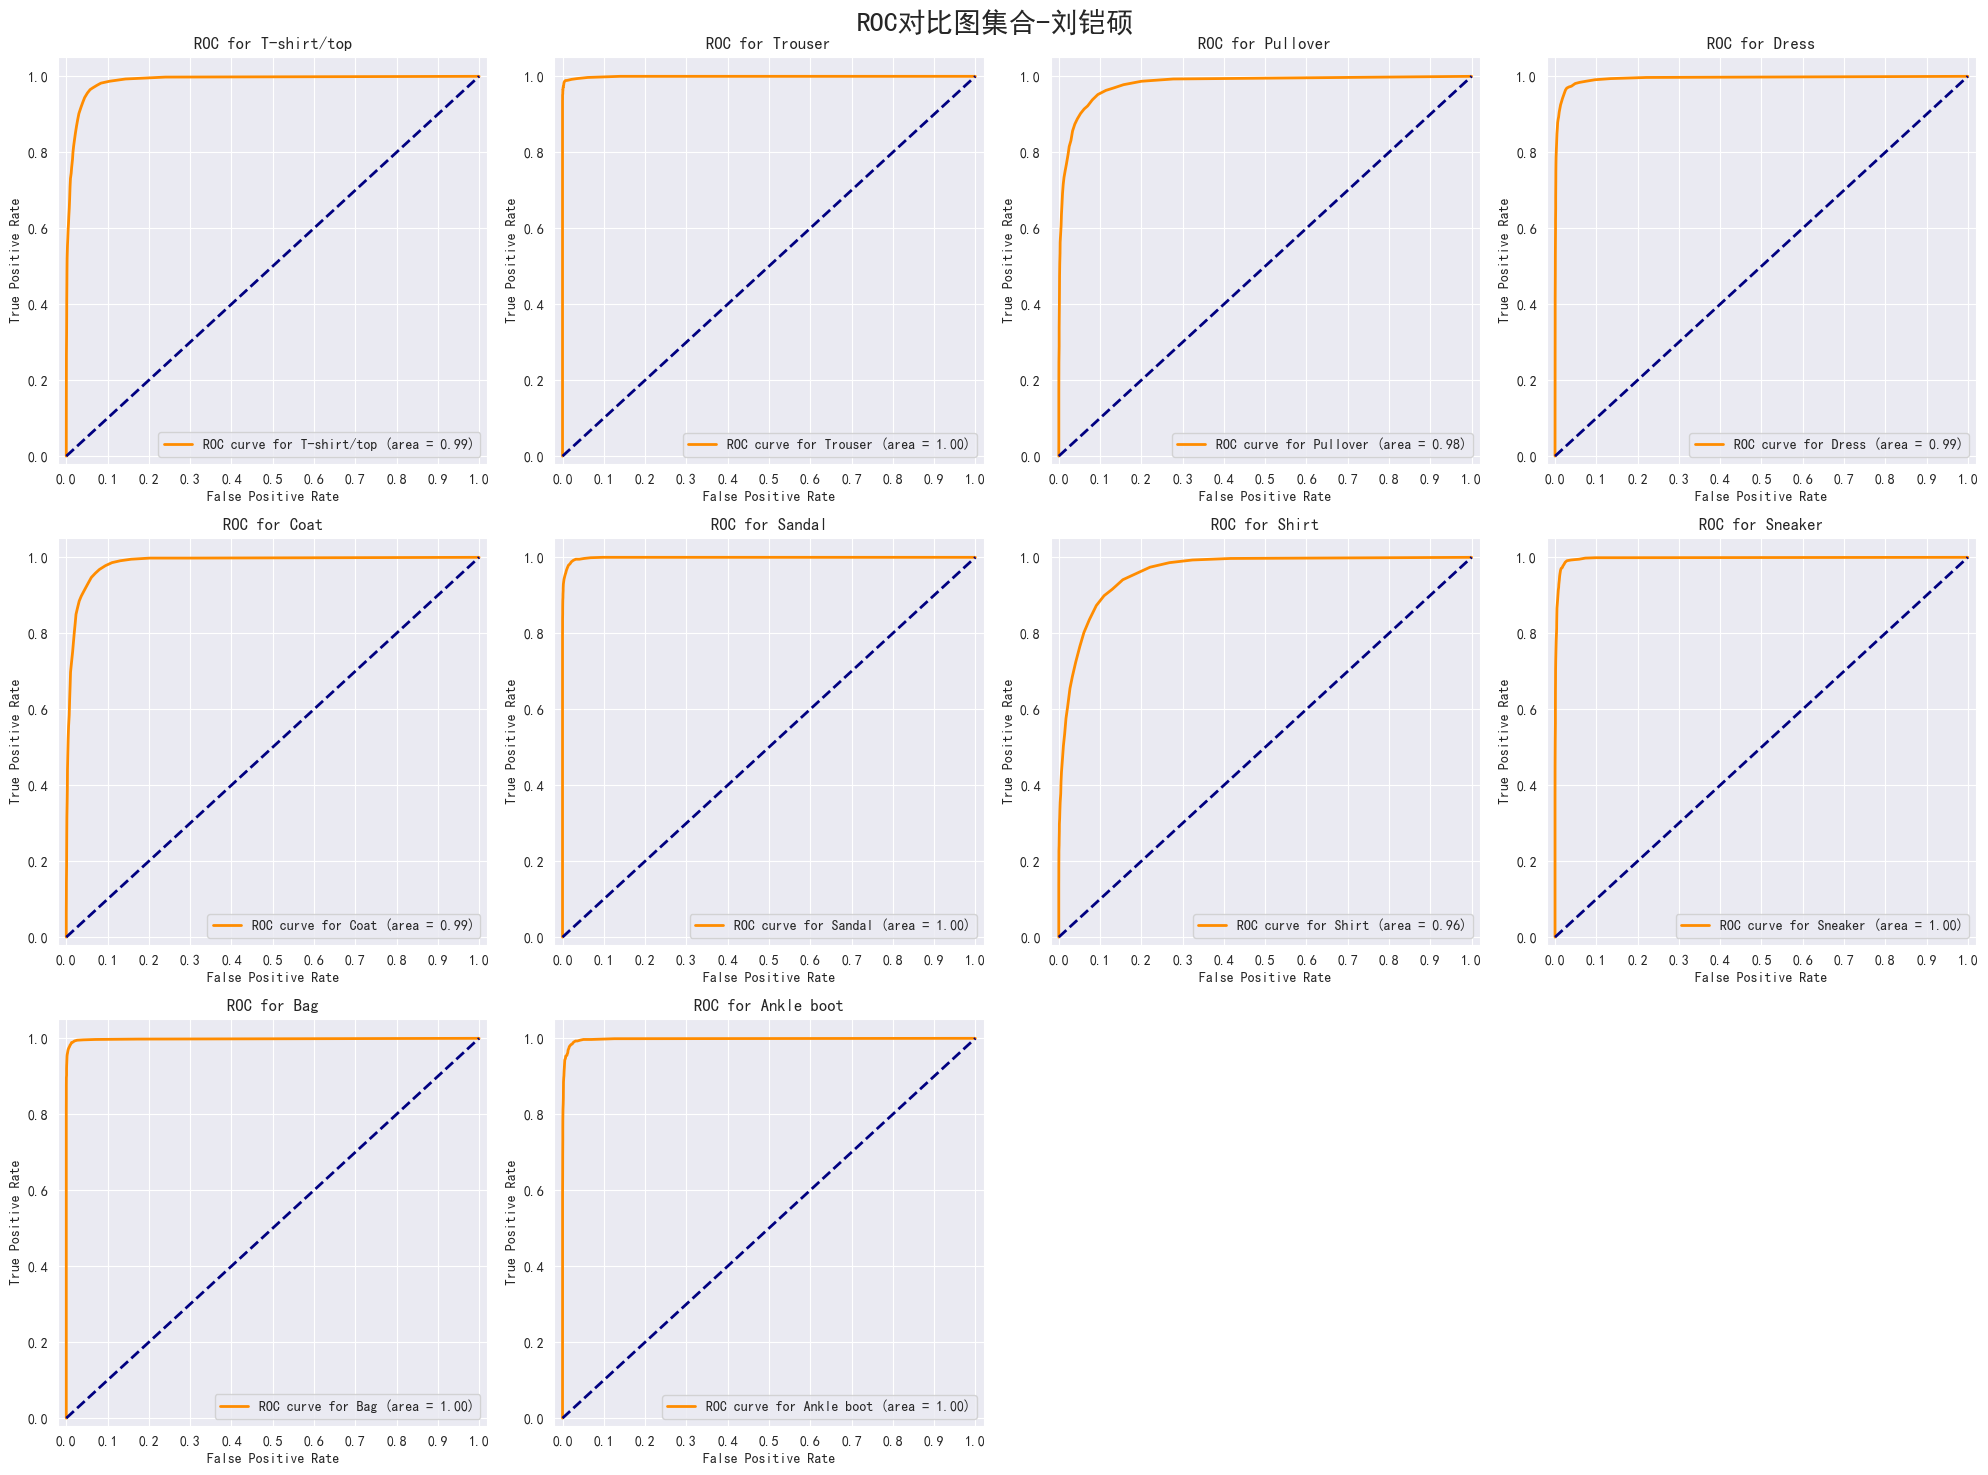

In [25]:
# 随机森林模型的概率预测
probs = rf_classifier_optimized.predict_proba(X_test)

# 绘制所有类别的ROC曲线
plt.figure(figsize=(20, 15))
plt.suptitle('ROC对比图集合-刘铠硕', fontsize=20)  # 设置总标题并指定字体大小为20
for i in range(10):
    prob_pos = probs[:, i]
    fpr, tpr, _ = roc_curve(y_test == i, prob_pos)
    roc_auc = auc(fpr, tpr)

    plt.subplot(3, 4, i+1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve for {labels_dict[i]} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.05])
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {labels_dict[i]}')
    plt.legend(loc="lower right")
    plt.grid(True)

plt.tight_layout()
plt.show()



计算每个类别的概率预测：通过predict_proba获取每个测试样本属于每个类别的概率。
绘制ROC曲线：对每个类别，使用roc_curve函数从sklearn.metrics计算FPR和TPR，然后绘制ROC曲线。
计算AUC值：使用auc函数计算ROC曲线下的面积，这个值表示模型在该类别上的整体表现。
可视化：为每个类别生成一个子图，显示ROC曲线和AUC值，并设置总标题和各个子图的标签。

从ROC曲线图来看，每个类别的ROC曲线都非常接近图的左上角，并且每个类别的AUC值为1.00。这表明随机森林模型表现出色。

## 学习曲线

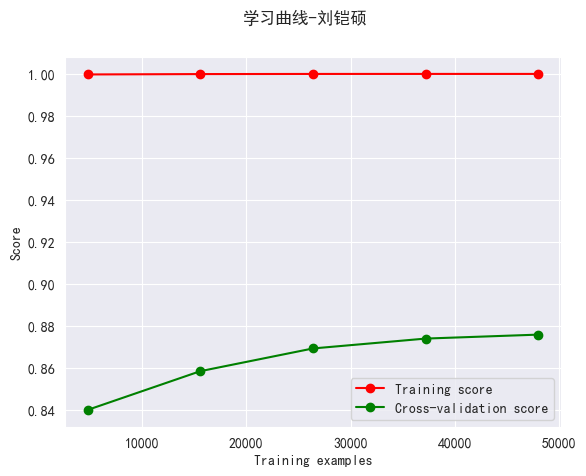

In [26]:
# 学习曲线
train_sizes, train_scores, test_scores = learning_curve(rf_classifier_optimized, X_train, y_train, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.suptitle('学习曲线-刘铠硕')  # 设置总标题
# 注意：代码输出的所有可视化结果图中必须加中文标题，并在标题结尾加上“实现该代码的学生姓名”，如“多种算法ROC曲线对比图-张三”。
plt.show()

### 分析学习曲线
#### 训练得分：

在图中，训练得分（红色线）随着训练样本数量的增加始终保持非常高，接近完美（1.0），这表明模型在训练数据上有非常好的拟合能力。
训练得分非常高且平稳，通常表明模型复杂度足以捕捉数据的所有关键特征。
#### 交叉验证得分：

交叉验证得分（绿色线）随着训练样本的增加而逐渐上升，从大约0.86增加到接近0.9，显示出随着更多数据的加入，模型的泛化能力有所提高。
交叉验证得分的提升说明模型在未见数据上的表现随着训练数据的增加而改善，这是一个积极的信号。
#### 曲线趋势与解读：

欠拟合与过拟合：从曲线看，模型没有表现出明显的过拟合迹象，因为训练得分和交叉验证得分之间的差距相对较小。模型在训练数据上的得分虽然很高，但交叉验证得分的持续增加表明模型仍在从额外的数据中学习，而不是简单地记住训练数据。
模型的复杂性：给定模型的复杂度与问题的复杂性相匹配，因为它能很好地学习训练数据，并且在添加更多数据时，其在验证集上的表现也在改善。

## 总结
本项目成功地使用随机森林分类器对Fashion MNIST数据集进行了分类，并通过多种可视化方法详细评估了模型的性能。通过数据预处理、模型选择与训练、模型评估等步骤，项目展示了如何系统性地进行机器学习项目。未来的工作可以包括尝试更多不同的分类算法，进一步优化模型参数，以及结合更多的数据增强和特征工程技术以提升模型的表现。总的来说，本项目为解决实际的图像分类问题提供了有效的方法和思路。模型的总体准确率达到了较高水平，表明随机森林分类器能够有效地分类Fashion MNIST数据集中的时尚物品。通过混淆矩阵和分类错误矩阵，我们识别出了模型在某些类别上的误分类情况，这为进一步优化模型提供了方向。特征重要性分析显示了一些关键特征在预测中的重要性，有助于未来的特征选择和模型改进。ROC曲线的结果显示模型在各个类别上的表现均非常出色，AUC值均接近1.0。学习曲线分析表明，模型在增加训练数据量时，性能有显著提升，这表明模型有良好的学习能力。

